# Assignment A1 [35 marks]

The assignment consists of 3 tasks. Each exercise may contain coding and/or discussion questions.

- When you need to **define a function**, do so in the appropriate **module**.
    - Functions for Task 1 should be defined in `task1.py`.
    - Functions for Task 2 should be defined in `task2.py`.
    - Functions for Task 3 should be defined in `task3.py`.
- Each module should only contain function definitions, and any required `import` statements (for example if you need to import `numpy`).
- For each question, a few simple **tests** will be provided in the notebook. You can use these to start checking that your function works as expected. They work similarly to your Coderunner quizzes.
    - In some cases, the tests use `assert` statements.
        - `assert X` will do nothing if `X` is `True`.
        - `assert X` will produce an `AssertionError` if `X` is `False`.
    - The provided tests are minimal (similar to the "Examples" provided for pre-checking in the Coderunner quizzes). To make sure that your function works fully with all possible inputs, you should add more of your own tests.
    - The tests that you write yourself will not be assessed.
    - When you submit on Gradescope, more automatic tests will be performed. You will see the results of **some** of these tests when you submit; if any fail, you can try to correct your code, and resubmit as many times as you want (until the deadline).
    - Gradescope will also have hidden tests which will test your functions further (similar to the further tests in the Coderunner quizzes, which are run when you click "Check"). You will not see the results of these tests until the grades and feedback are returned to the class. This means, in particular, that *passing all the visible tests on Gradescope does not guarantee full marks.*
- For **non-code** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.
- **Up to half** of the marks for a given question may be deducted for missing, incomplete, or inaccurate code comments, poorly displayed results, or poorly labelled or unclear plots.

In [3]:
# Run this cell to import your modules
import task1, task2, task3
import importlib
import numpy as np
import matplotlib.pyplot as plt

---

## Task 1: Integer roots [16 marks]

The "squares" are one of the most important classes of integers: the integers $n\ge0$ where there is another integer $r \ge 0$ with $n = r \cdot r$.

An obvious question about any given integer is, "Is a number a perfect square?". To answer this question requires taking a generalised kind of "square root" of any non-negative integer. 

There is no unique way to take a square root of a number that is not a perfect square and get an integer. But one common-sense solution is to consider the ***floor square root***, a.k.a the ***integer square root.*** For a given non-negative integer $n$, the floor square root of $n$ is the non-negative integer $r$ such that

$$
r \ = \ \text{floor\_sqrt}(n) \quad \text{where} \quad r^{2} \ \le  \ n  \ < \  (r+1)^{2}.
$$

It's also the same as computing the square root and rounding down the result. It's the counterpart to the common floor divide operator `//` used in Python.

If you can take the $\text{floor\_sqrt}(n)$, then finding whether a number is a perfect square is as easy as testing if 

    floor_sqrt(n)**2 == n 

---
#### 🚩 Task 1a [1 mark]

Write a Python function called `check_floor_root()`, which takes 3 input arguments:

- `number`, an `int` representing a non-negative integer $n$,
- `root`, an `int` representing a non-negative integer $r$,
- `power`, an `int` representing a positive integer $p$, with the default value `power=2`.

Your function should check whether $r$ is the $p$th floor root of $n$, i.e. whether the following condition is verified:

$$
r^{p} \ \le \ n \ < \ (r + 1)^{p}.
$$

Your function should return `True` or `False` (as a `bool`) depending on whether or not the condition is met.

In [5]:
# Testing
importlib.reload(task1);
assert task1.check_floor_root(16, 4)
assert task1.check_floor_root(17, 2, power=4)
assert task1.check_floor_root(25, 6) == False
print('All tests pass.')

All tests pass.


---
### An unsafe method 

You might think computing $\text{floor\_sqrt}(n)$ is easy: take the square root and only keep the integer part. This method works well enough for small numbers (typically, fewer than 30 digits); however, it can fail on larger numbers when roundoff errors become significant.

Here is a simple, but unreliable, function:

```python
def unsafe_floor_sqrt(x):
    return int((x + 0.5)**(1/2))
```

The extra `0.5` is to ensure that (e.g.) `25**(1/2)` doesn't come out to (e.g.) `4.9999999999` and then get rounded down to `4`. However, even with this trick, we still won't be able to get good answers for large numbers. 

For example, you can create a 40-digit perfect square and see if the floating-point square root gives the correct result. 

In [6]:
r = 86874147988086870772
n = r**2
u = task1.unsafe_floor_sqrt(n)

print(f'Exact root:    {r}')
print(f'Computed root: {u}')
print(f'Error: {abs(r - u)}')

Exact root:    86874147988086870772
Computed root: 86874147988086865920
Error: 4852


Note that the problem comes from the operations in `unsafe_floor_sqrt()`, which has to use floating-point numbers, subject to round-off error. In Python, we can store integers as large as we want, and operate on them without risking numerical error -- as long as we perform integer operations. This is why `r**2` can be trusted to be accurate: it doesn't need any intermediate floating-point values.

Before we go further, it will be quite useful to be able to generate random integers of different sizes. This will allow you to test your code with diferent inputs.

---
#### 🚩 Task 1b [2 marks]

Write a Python function called `random_number()`, which takes 1 input argument:

- `digits`, an `int` representing a number of digits,

and returns a random non-negative integer with exactly `digits` number of decimal digits (drawn from a uniform distribution of all possibilities).

In [7]:
# Testing (check that the output is sensible)
importlib.reload(task1);
print(task1.random_number(1))
print(task1.random_number(8))
print([task1.random_number(4) for i in range(5)])
print(task1.random_number(500))

4
20452897
[2275, 4074, 3085, 2466, 1199]
46099173224182215002052113769494769156304642577894217624285152948807639174728198077340866960684293503381730689934301648463591085192196959263940591570887315734091346524542429615181593363689367148429422076747794404845534797327363035774444610224009589862808156362630366581082980413305106142905582427303482404498670746741995665914872137451752333947630301661049152446289968271473095896171355738329655458474848688963713386720963401280693833058735818124620977734128227995923839886798177816903524169474979515


---
#### 🚩 Task 1c [3 marks]

Write a function called `unsafe_failure_rate()`, which determines an approximate failure rate for the `unsafe_floor_sqrt(n)` function, depending on the number of digits of `n`. Your function should take 2 input arguments:

- `number_sizes`, a list of different numbers sizes to test (as numbers of digits),
- `samples`, an `int` representing how many random numbers of each size you will test, with a default value `samples=500`.

For a given number of digits, your function should use `check_floor_root()` for each random number you test, in order to determine the frequency at which `unsafe_floor_sqrt()` gives the wrong result. Your function should return a list `frequencies` of the same length as `number_sizes`, containing the failure rates of `unsafe_floor_sqrt()` (as a number between 0 and 1) for each respective number of digits.

For example, if you want to test `unsafe_floor_sqrt()` on 1-, 2-, and 3-digit numbers, using 50 random numbers of each size, you would do:

    In [1]: task1.unsafe_failure_rate([1, 2, 3], samples=50)
    Out[1]: [0.0, 0.0, 0.0]
    
Of course, the function never fails in this example because the numbers are small. In this case, we can use fewer `samples` than the default. 

Likewise, we can try with 50-digit numbers (and the default 500 `samples`),

    In [2]: task1.unsafe_failure_rate([50])
    Out[2]: [1.0]
    
In this case, the function always gets the wrong answer. (Somewhere in the middle, the answers are more interesting!)

In [8]:
# Testing
importlib.reload(task1);
assert task1.unsafe_failure_rate([1, 2, 3], samples=50) == [0., 0., 0.]
assert task1.unsafe_failure_rate([50]) == [1.]
print('All tests pass.')

AssertionError: 

---
#### 🚩 Task 1d [3 marks]

Using your `unsafe_failure_rate()` function from Task 1c, plot the failure rate of `unsafe_floor_sqrt(n)` as a function of the number of digits of `n`.

You should test and plot your results for different number sizes, in a way which clearly shows the transition from the computed root being always correct, to always wrong. Your plot must be presented in a clear and understandable manner.

Explain the results you observe in the plot, whether this corresponds to what you expected, and why/why not.

_Write your code for this question in the code cell below. Do not re-define any functions in the notebook; use your `task1` module._

_Write your comments and explanations in the Markdown cell below._

All tests passed.
All tests passed.


Text(0.5, 1.0, 'Number of Digits vs Failure Rate of Square Root With Floating Point Arithmetic')

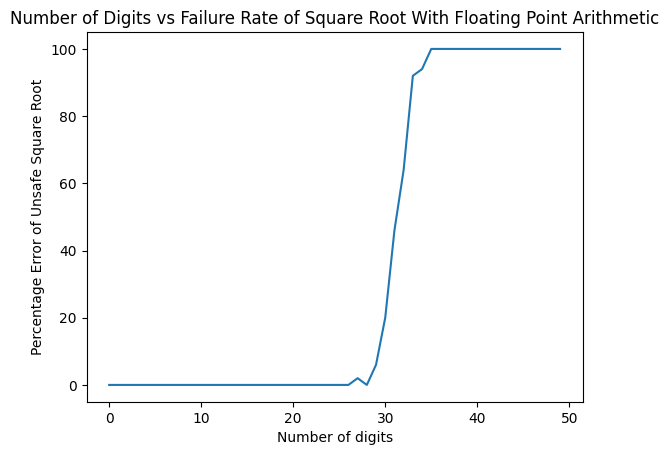

In [ ]:
# Code for Task 1d
importlib.reload(task1)

#run unsafe failure with 50 samples and for 1 digit through 51 digits
l = task1.unsafe_failure_rate(list(range(1, 51)), samples=50)

#convert to percentages add plot
l = list(map(lambda x: x*100, l))
plt.plot(l)

#label the graph
plt.ylabel("Percentage Error of Unsafe Square Root")
plt.xlabel("Number of digits")
plt.title("Number of Digits vs Failure Rate of Square Root With Floating Point Arithmetic")


For numbers less than 20 digits the unsafe square root is fairly reliable. Incorrect results below 28 digitis are realtively rare but do occur depending on the numbers sampled. After this point the failure rate climbs extremely quickly with the number of digits becoming almost always incorrect above 33 digits and being all but guarunteed to fail for numbers above 35 digits.

---
### Floor root

You can compute the floor square root of an integer without resorting to floating-point calculations. You only need to keep track of your arithmetic carefully, and make use of the following result:

#### 🚩 Task 1e [1 mark]

Let $k \in \mathbb{N}$. Show that the floor square root of a $k$-digit number $n$ has $\frac{k}{2}$ digits if $k$ is even, and $\frac{k+1}{2}$ digits if $k$ is odd.

Since n is a k digit number we have:
$$10^{k-1} \leq n < 10^{k}$$
Taking the square root of this inequality gives:
$$10^{\frac{k-1}{2}} \leq \sqrt{n} < 10^{\frac{k}{2}}$$
If k is even then $\frac{k}{2}$ is an integer but $\frac{k-1}{2}$ is not however and we want integer powers of 10 to determine the number of digits. However $10^{\frac{k}{2} - 1} < 10^{\frac{k-1}{2}}$ so:
$$10^{\frac{k}{2} - 1} \leq \sqrt{n} < 10^{\frac{k}{2}}$$
which means that $\lfloor \sqrt{n} \rfloor$ is $\frac{k}{2}$ digits since the inequality will still hold with rounding down. However, if k is odd then $\frac{k - 1}{2}$ is an integer but $\frac{k}{2}$ is not however $10^{\frac{k + 1}{2}} > 10^{\frac{k-1}{2}}$ and $\frac{k - 1}{2} = \frac{k + 1}{2} - 1$ giving the inequality:
$$10^{\frac{k + 1}{2} - 1} \leq \sqrt{n} < 10^{\frac{k + 1}{2}}$$
which means that $\lfloor \sqrt{n} \rfloor$ is $\frac{k+1}{2}$ digits for the same reason as previously.


---
### The algorithm

Suppose you have a 4-digit number with decimal digits $a,b,c,d$:

$$
n = abcd \ = \ 10^2 \cdot ab  + cd,
$$

where $\cdot$ denotes multiplication. Let $r$, a 2-digit number with digits $e,f$ be the floor square root of $n$, that is

$$
r = ef = 10\cdot e + f \quad \text{such that} \quad r^2 \leq n < (r+1)^2.
\qquad \qquad (1)
$$

We have

$$
\frac{r^2}{10^2} = \left(\frac{r}{10}\right)^2 = \left(e + \frac{f}{10}\right)^2 \geq e^2
\quad \text{and} \quad
\frac{(r+1)^2}{10^2} = \left(e + \frac{f+1}{10}\right)^2 \leq \left(e + 1\right)^2
\quad \text{since } 0 \leq f \leq 9.
$$

Therefore, dividing $(1)$ by $10^2$ then taking the $\text{floor}$ of the result leads to

$$
e^2 \leq n\ //\ 10^2 = ab < (e+1)^2,
$$

where $//$ indicates floor division. This is to say that

$$
e = \text{floor\_sqrt}(ab).
$$

The algorithm works as follows:

- Compute $ab = n\ //\ 10^2$.
- The value of $e$ can be found by simply testing integers from 0 to 9, to find the largest integer $e$ such that $e^2 \leq ab$.
- Then, the second digit $f$ can be determined similarly, by testing integers from 0 to 9 to find the largest integer $f$ such that $(10\cdot e + f)^2 \leq abcd$.
- If we had a number with more digits, we would keep going the same way.

Here is an example with 5 digits. Suppose we start with $n=54321$. We need to take digits 2 at a time. So this is actually a 6-digit number for the purposes of our method (with a leading zero). We are therefore expecting a 3-digit floor square root. For the first digit:

$$
5 = 54321\, // \, 10^{4},
$$

and

$$
2^{2} \ \le \ 5 \ < \ (2+1)^{2},
$$

so the first digit is $2$. In other words, our current (rough!) approximation is $200$. Next,

$$
543 = 54321\, // \, 10^{2},
$$

and

$$
(20 + 3)^{2} \ \le \ 543 \ < \ (20 + 4)^{2},
$$

so the second digit is $3$. We have refined our approximation to $230$. Finally,

$$
(230 + 3)^{2} \ \le \ 54321 \ < \ (230 + 4)^{2},
$$

so the third digit is $3$. The floor square root is therefore

$$
233 = \text{floor_root}(54321).
$$

---
#### 🚩 Task 1f [4 marks]

Write a function called `floor_square_root()` which takes 1 input argument, a positive integer `number` (`int`), and returns the floor square root of `number`, as an `int`, using the algorithm described above.

The function should work almost instantaneously on huge numbers; you should easily be able to compute the floor roots of numbers with 1000s of decimal digits.

In [ ]:
# Testing with different number sizes
importlib.reload(task1);
for digits in [5, 10, 15]:
    n = task1.random_number(digits)
    r = task1.floor_square_root(n)
    assert task1.check_floor_root(n, r)
print('All tests passed.')

---
#### 🚩 Task 1g [2 marks]

Generalise the algorithm to find the $p$th floor root. Write a function called `floor_root()` which takes 2 input arguments:

- a positive integer `number` (`int`),
- a non-negative integer `power` (`int`), with a default value `power=2`, representing $p$,

and returns the $p$th floor root of `number`, as an `int`, using your generalised algorithm.

In [9]:
# Testing with different number sizes
importlib.reload(task1);
for digits in [5, 10, 15]:
    n = task1.random_number(digits)
    # Testing with different powers
    for p in [2, 3, 4]:
        r = task1.floor_root(n, power=p)
        assert task1.check_floor_root(n, r, power=p)
print('All tests passed.')

All tests passed.


---
## Task 2: Reckoning WidGets [10 marks]

You work for a company (WidGet LLC) that makes widgets. 

* You only have three types of raw materials: `'RED'`, `'YELLOW'`, `'BLUE'`.

* All widgets are stored in a `list`.

* Out of the raw materials, you have three primary widgets:
    
    ```python
    red    = ['RED']
    yellow = ['YELLOW']
    blue   = ['BLUE']
    ```

* You can make widgets with arbitrary complexity by combining simpler widgets. For example:

    ```python
    print([2*red, blue])
    ```
    ```
    [['RED', 'RED'], ['BLUE']]
    ```

* But you have a few *designer* widgets that have names: 

    ```python
    purple  = [red, blue]
    green   = [yellow, blue]
    orange  = [red, yellow]
    white   = [3*red, 3*orange, 3*yellow, 3*green, 4*blue, 2*purple]
    pink    = [white, red]
    black   = [pink, purple]
    grey    = [black, white]
    joker   = [purple, green]
    sulphur = [white, yellow]
    galah   = [pink, grey]
    flock   = [sulphur, galah]
    ```
        
* But your company might want completely new designer widgets next season. You never know what will be in style. These above examples are just a few that some intern came up with -- they are not official -- but we might want to price these or any other combinations. 


* The price of the raw materials tends to change over time. 


* WidGet LLC needs to be able to compute the cost of **any *arbitrary* combination of widgets** for any prices of the raw materials; it's in the company's bylaws.


* The price of any combination is the **sum** of the prices of the components.  

---
#### 🚩 Task 2a [4 marks]

Write a function called `price()`, which takes 4 input arguments:

- `widget`, a list (possibly nested) representing a given widget,
- three non-negative numbers `r`, `y`, `b`, representing respectively the prices of the `'RED'`, `'YELLOW'`, and `'BLUE'` raw materials, given in £ (GBP),

and returns the price of any `widget` given any prices of the raw materials, `r`, `y`, `b`. Your function should return the price of the `widget` rounded to the nearest £0.01.

***HINTS:*** There are two efficient ways to solve this task. They involve either tallying each layer's prices in terms of the lower layers (breadth first), or go to the bottom of a given widget before doing the others (depth first). The depth-first method is very simple with *recursion* (see e.g. the Week 4 or Week 5 workshop tasks for examples of recursive functions).


***DO NOT*** attempt to hardcode any of the above `widgets` in your function definition. You need to be able to compute the price for *any* composite `widget`. Someone may place an order of (e.g.),
    
```python
my_order = [sulphur, joker, red, red, red, flock]
```

This is a highly composite widget -- for instance, the `flock` widget contains five layers of made-up widgets.


In [ ]:
# Testing
red    = ['RED']
yellow = ['YELLOW']
blue   = ['BLUE']
purple = [red, blue]
green  = [yellow, blue]
joker  = [purple, green]

importlib.reload(task2);
assert task2.price(blue, 1, 2, 3) == 3
assert task2.price(2*blue, 1, 2, 3) == 6
assert task2.price(purple, 5.5, 2, 4.5) == 10
assert task2.price(joker, 2, 4, 3) == 12
print('All tests passed.')

---
#### 🚩 Task 2b [2 marks]

Write a function called `constituents()`, which takes a `widget` as an input, and determines the number of each primary widget (`red`, `yellow`, `blue`) in the given `widget`.

Your function should return a `list` `[nr, ny, nb]`, containing the respective number of `red`, `yellow`, and `blue` widgets.

In [ ]:
# Testing
importlib.reload(task2);
assert task2.constituents(blue) == [0, 0, 1]
assert task2.constituents(2*blue) == [0, 0, 2]
assert task2.constituents(purple) == [1, 0, 1]
assert task2.constituents(joker) == [1, 1, 2]
print('All tests passed.')

---
### Oh, Nooooo!

A *absolute disaster* has happened. Your coworker computed the prices for several orders yesterday. They used a set of raw-material prices, but somehow those got lost in a computer crash. All that's left are the totals for the orders. You need to reconstruct yesterday's raw-material prices for the accounting department. Everyone will panic if you don't; they are already panicking. Emails are piling up! 

Here's what we know about the situation:

* There are a few common designer widgets that the company is using this season: 

    ```python
    orange = 2*red + 4*yellow
    purple = 5*red + 4*blue
    brown  = 4*red + 7*yellow + 18*blue
    ```

* The customer orders were:

    ```python
    monday = 4*orange + 7*purple + 10*brown
    zeta   = 5*orange + 10*purple + 8*brown
    party  = 9*orange + 3*purple
    ```
        
* Fortunately, you have the prices saved:

        In [1]: price(monday, r, y, b)
        Out[1]: 2087
        
        In [2]: price(zeta, r, y, b)
        Out[2]: 1976
        
        In [3]: price(party, r, y, b)
        Out[3]: 411
        
        
* Unfortunately, you've also lost the prices of the `orange`, `purple` and `brown` designer widgets.

---
#### 🚩 Task 2c [4 marks]

Write a function that can solve this problem, i.e. compute `r`, `y`, and `b` from a given list of orders and corresponding total prices. It happens that this isn't the first time this has occurred at the company. It will probably happen again. We want to make a function that will work on different numbers of widgets and orders.

* You talked to someone in IT, and they are only able to get you the data in the following format:

        orders = [monday, zeta, party]
        totals = [2087, 1976, 411]
        
    where list entries are defined above.
    

* Your function should take 2 input arguments, `orders` and `totals`, where `orders` is a list of arbitrary widgets (one order is essentially the same as one composite widget), and `totals` is a list of the total prices for each order.


* Your function should return a list of 3 numbers `[r, y, b]`, representing the respective prices of each raw material. Because of outdated computer systems, you absolutely need to return the prices rounded to the nearest £0.01.


* Partial marks will be given for solutions which assume that there will always be exactly 3 independent orders available in the data. For full marks, your function should also handle the case where data for more than 3 orders is available.

    You can assume that, in all cases, any given set of orders will consist of at least 3 linearly independent combinations of the raw materials. For instance, this would be a valid order:
  
    ```python
    orders = [monday, zeta, monday + 2*zeta, party]
    totals = [631.18, 604.64, 1840.46, 169.02]
    ```

In [ ]:
# Testing
importlib.reload(task2);

orange = 2*red + 4*yellow
purple = 5*red + 4*blue
brown  = 4*red + 7*yellow + 18*blue

monday = 4*orange + 7*purple + 10*brown
zeta   = 5*orange + 10*purple + 8*brown
party  = 9*orange + 3*purple

assert task2.reconstruct_prices([monday, zeta, party], [2087, 1976, 411]) == [7, 3, 6]
assert task2.reconstruct_prices([monday, zeta, monday + 2*zeta, party],
                                [631.18, 604.64, 1840.46, 169.02]) == [2.5, 2, 1.21]
print('All tests passed.')

---
## Task 3: Efficient numerical integration [9 marks]

When you numerically integrate functions in serious applications, almost all cost considerations boil down to the number of *function evaluations* -- the number of points at which you have to compute $f(x)$.

Evaluating a function isn't a big problem for the simple examples you encounter in a numerical methods course. But in the real world, your function could be a very complex thing -- for example, _the total approximate probability that the Great Barrier Reef will die in the next 20 years as a function of the number of a certain type of fish per square kilometre_.

Simply "evaluating" this function once might involve a costly and time-consuming field campaign to count fish. After finding the number, you might plug the data into a simple mathematical model that computes an integral for the answer.

In general, for each specific problem, we want to use a method that is perfectly tuned to give accurate answers without going back and doing more "function evaluations" (fish counting).

We are going to consider numerical integration through the lens of function evaluations, but on a much simpler problem. To do this, we need a good way to count function evaluations. 

There is a very powerful Python concept called *decorators*. They are functions you can define to add more features to another, existing function.

How decorators work won't be covered in this course, but if you'd like to learn more, [this is quite a good explanation](https://realpython.com/primer-on-python-decorators/). The important thing is that the `counter()` decorator in `task3` can be used to count the number of function evaluations.

Next, we will use a model function that depends on a parameter.

$$
K_{a}(x) \ = \ \frac{1}{\sqrt{\,a-\cos(x)}}, \qquad \text{for}\qquad x \, \in \, [-\pi,\pi],
$$

where the real-valued parameter $a > 1$.

The function `define_Ka()` in `task3` takes an `a` parameter, and returns ***another function ready to be evaluated*** at any given $x$. We've also used our decorator `counter()`, so that we can track the number of times our new function `Ka()` will be evaluated.

Let's try it out by making an array between $-\pi,\pi$ with 10 grid points. 

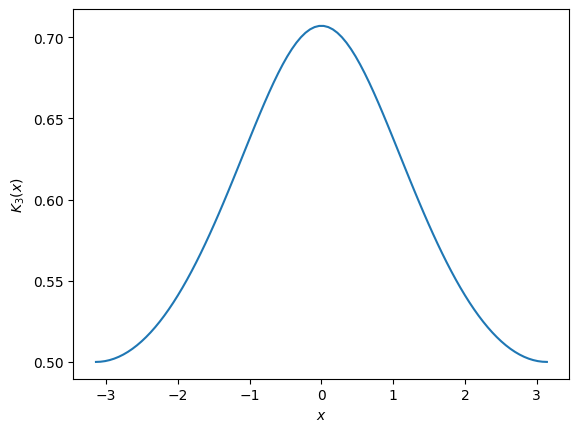

In [6]:
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(task3);

# Create our function Ka(x) with a=3
K3 = task3.define_Ka(3)

# Create an x-axis with 100 points between -pi and pi
n = 100
x = np.linspace(-np.pi, np.pi, n)

# Use our new function K3()
y = K3(x)

# Plot the function
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel=r'$x$', ylabel=r'$K_3(x)$')
plt.show()

Thanks to our decorator, we can see how many times `K3` has been evaluated so far:

In [ ]:
print(K3.evals)

This is 100 times, because `y = K3(x)` evaluated the function at 100 different points. Now we can evaluate it once more, and check again:

In [ ]:
# One more point
z = K3(2)

# Check the number of evaluations
print(K3.evals)

As expected, calculating `K3(2)` increased `K3.evals` by 1.

---
#### 🚩 Task 3 [9 marks]

Write a function (in `task3`) called `Kintegral()` that numerically evaluates 

$$
\mathcal{I}(K_a) \ = \ \int_{-\pi}^{\pi} K_a(x) \, \text{d} x.
$$

Your function should take 2 input arguments:

- a **function** `Ka`, of the same kind as `K3` above,
- a positive integer `n`, an `int`, which represents your "evaluation budget",

and return a numerical approximation of the integral defined above, with **as little error as possible**, using **exactly** `n` evaluations of `Ka()`.

You can display `Ka.evals` after computing the integral, to make sure that you evaluate $K_a(x)$ exactly `n` times. For example, your code should give the following output:

        In [1]: K3 = define_Ka(3)
        In [2]: n = 20
        In [3]: Kintegral(K3, n);
        In [4]: print(K3.evals)
                20

This example doesn't indicate whether `n = 20` is a good or insufficient number of evaluations, nor does it say what the error, in this case, would be. Instead, this example is only to show you how the system should behave so that you can test your code and ensure it's working correctly.

You will need to use a composite numerical integration method (see Weeks 5 and 6). In any case, you should justify your choice of method, either with an analytical argument or a numerical demonstration.

***HINTS:***

- You could start by writing functions which implement different composite methods. The code you have from Weeks 5 and 6 is a good starting point, but will need some work in order to avoid e.g. evaluating the function twice at the same node unnecessarily.

- You can obtain a "ground truth" value of the integral by using an appropriate numerical integration method with sufficiently many nodes. This will be useful to evaluate the error of different methods.

In [4]:
# Testing (this only tests that you use the correct number of function evaluations)
importlib.reload(task3);
import numpy as np

# Testing with a random value of a and n
a = 1 + 3*np.random.random()
Ka = task3.define_Ka(a)
n = np.random.randint(2, 51)

# Call the function twice
task3.Kintegral(Ka, n);
assert Ka.evals == n
task3.Kintegral(Ka, n);
assert Ka.evals == 2*n

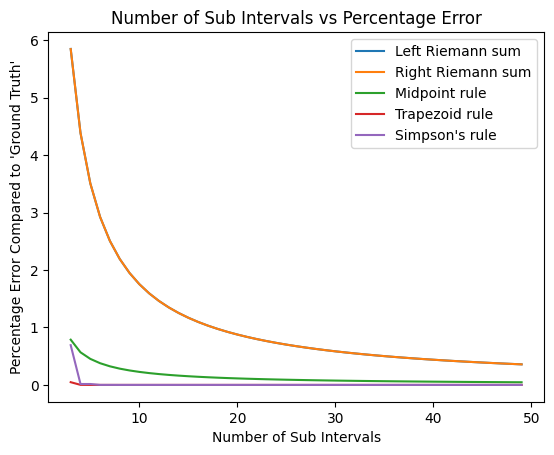

In [24]:
# You may use this code cell for any code which will help your argument/demonstration.
importlib.reload(task3);

#set up values for running the integration methods
GROUND_TRUTH = 3.708149354602744
f = task3.define_Ka(3)
N = 50
START = 3
size = list(range(START, N))

#run the different methods and find their percentage errors
left_rimeann_error = [(np.abs(task3.riemannL(f, n) - GROUND_TRUTH)/GROUND_TRUTH)*100 for n in range(START, N)]
right_rimeann_error = [(np.abs(task3.riemannR(f, n) - GROUND_TRUTH)/GROUND_TRUTH)*100 for n in range(START, N)]
midpoint_error = [(np.abs(task3.midpoint(f, n) - GROUND_TRUTH)/GROUND_TRUTH)*100 for n in range(START, N)]
trapezoid_error  = [(np.abs(task3.trapezoid(f, n) - GROUND_TRUTH)/GROUND_TRUTH)*100 for n in range(START, N)]
simpsons_error  = [(np.abs(task3.simpsons(f, n) - GROUND_TRUTH)/GROUND_TRUTH)*100 for n in range(START, N)]


#add errors of the integration method onto the graph
plt.plot(size, left_rimeann_error, label = 'Left Riemann sum')
plt.plot(size, right_rimeann_error, label = 'Right Riemann sum')
plt.plot(size, midpoint_error, label = 'Midpoint rule')
plt.plot(size, trapezoid_error, label = 'Trapezoid rule')
plt.plot(size, simpsons_error, label = 'Simpson\'s rule')

#label the graph
plt.ylabel("Percentage Error Compared to 'Ground Truth'")
plt.xlabel("Number of Sub Intervals")
plt.title("Number of Sub Intervals vs Percentage Error")
plt.legend()


In order to choose the most accurate numerical integration method I first started by establishing a "ground truth" value using the scipy integrate.quad function which gave a value of $3.708149354602744$ for the integral from $-\pi$ to $\pi$ and an upper bound on the error as $7.167499233018404*10^{-12}$.

I then implemented left and right riemann sums, the midpoint rule, the trapezoid rule and Simpson's rule and compared them to the ground truth value over a range of sizes of n and graphed their percentage error as seen above. The numerical integration was also only carried out from $0$ to $\pi$ since Ka is always an even function multiplying this by 2 gives the integral from $-\pi$ to $\pi$. It can be seen on the graph that Simpson's rule and the trapezoid rule were the most accurate very quickly they both fall within the error range of the ground truth value. The left and right Riemann sums had the same percentage error. The trapezoid rule was slightly more accurate for small numbers of sub intervals though they both were very accurate and very quickly dropped to very low percentage errors. The midpoint rule outperformed the left and right Riemann sums but was consistently less acurate than Simpson's or Trapezoid rule. I decided to implement Kintegral as the trapezoidal method since it worked slightly better for smaller numbers of sub intervals and did not involve correcting for non even numbers of sub intervals.